<a href="https://colab.research.google.com/github/rishicarter/Tensorflow_fundamentals/blob/main/02_Tensorflow_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# Input and output shapes
# shape = [batch_size, width, height, colour_channels]
# Batch_size = 32 (very common)

In [ ]:
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
X[:3],y[:3]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203]]), array([1, 1, 1]))

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})

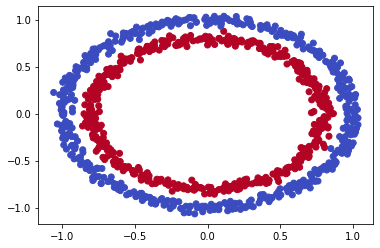

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm);

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
# Model1
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
  #tf.keras.Input(shape=([])),
  tf.keras.layers.Dense(1)
])
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model1.fit(X,y,epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 11/20
32/32 [

In [ ]:
model1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932805180549622, 0.5]

In [ ]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model2.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 1.0455 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.5100
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4650
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4880
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4780


In [ ]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(X,y,epochs=100)

In [ ]:
model3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5500


[0.6932094097137451, 0.550000011920929]

In [ ]:
model3.predict(X)

In [ ]:
import numpy as np
def plot_decision_boundary(model,X,y):
  '''
  PLot decision boundary
  '''
  x_min,x_max=X[:,0].min()-0.1,X[:,1].max()+0.1
  y_min,y_max=X[:,0].min()-0.1,X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  x_in=np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)
  if(len(y_pred[0]))>1:
    # Multiclass classification
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    y_pred=np.round(y_pred).reshape(xx.shape)
  
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

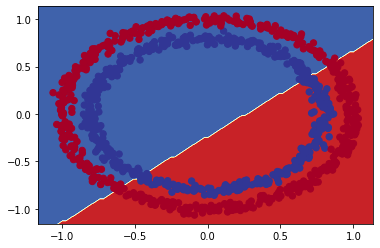

In [ ]:
plot_decision_boundary(model3,X,y)

In [ ]:
#(tf.expand_dims(X_reg_train, axis=-1),
tf.random.set_seed(42)
X_reg = tf.range(0,1000,5)
y_reg=tf.range(100,1100,5)

Xreg_train,Xreg_test,yreg_train,yreg_test=X_reg[:150],X_reg[150:],y_reg[:150],y_reg[150:]
model3.fit(tf.expand_dims(Xreg_train,axis=-1),yreg_train,epochs=5)

In [ ]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])
model3.fit(tf.expand_dims(Xreg_train,axis=-1),yreg_train,epochs=100)

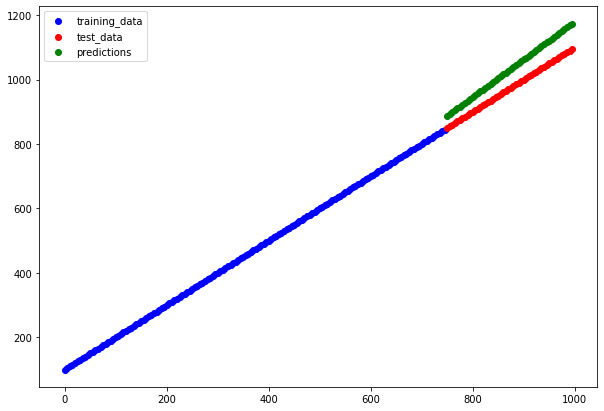

In [ ]:
yreg_pred=model3.predict(Xreg_test)
plt.figure(figsize=(10,7))
plt.scatter(Xreg_train,yreg_train,c='b',label='training_data')
plt.scatter(Xreg_test,yreg_test,c='r',label='test_data')
plt.scatter(Xreg_test,yreg_pred,c='g',label='predictions')
plt.legend();

In [ ]:
tf.random.set_seed(42)
model4=tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
hist4=model4.fit(X,y,epochs=100)

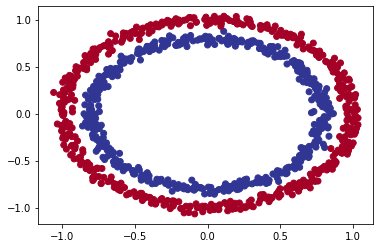

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

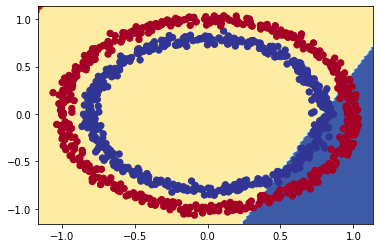

In [ ]:
plot_decision_boundary(model4,X,y)

In [ ]:
tf.random.set_seed(42)
model5=tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation='relu')
])
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
hist5=model5.fit(X,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150


In [ ]:
tf.random.set_seed(42)
model6=tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid'),
])
model6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
hist6=model6.fit(X,y,epochs=250)

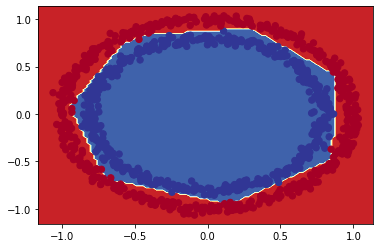

In [ ]:
plot_decision_boundary(model6,X,y)

In [ ]:
model6.evaluate(X,y)

32/32 [==============================] - 1s 6ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593363776803017, 0.9919999837875366]

In [ ]:
# Tensor
tensor = tf.cast(tf.range(-10,10),tf.float32)
tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

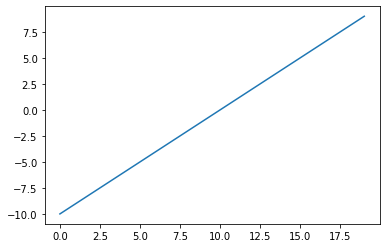

In [ ]:
plt.plot(tensor)

In [ ]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

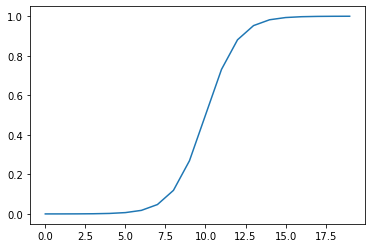

In [ ]:
plt.plot(sigmoid(tensor))

In [ ]:
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

In [ ]:
tf.random.set_seed(42)
model7=tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  # tf.keras.layers.Dense(2,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])
hist7=model7.fit(X_train,y_train,epochs=25)

In [ ]:
model7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

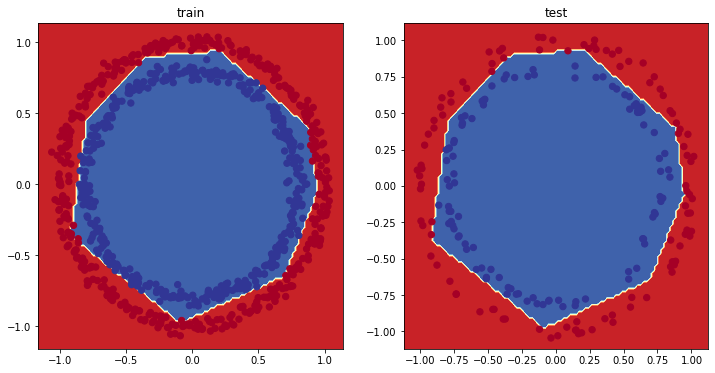

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model7,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model7,X_test,y_test)

Text(0.5, 1.0, 'Loss Curves')

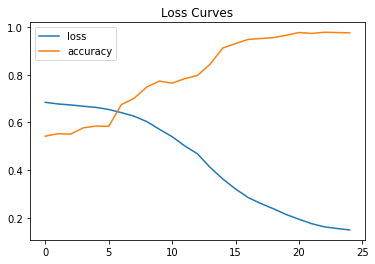

In [ ]:
# Tensorboard
import pandas as pd
pd.DataFrame(hist7.history).plot()
plt.title('Loss Curves')

In [ ]:
tf.random.set_seed(42)
model8=tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  # tf.keras.layers.Dense(2,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])
# Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
hist8=model8.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

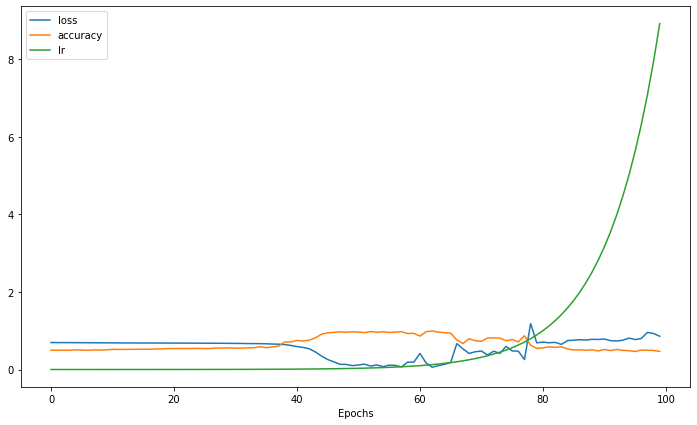

In [ ]:
pd.DataFrame(hist8.history).plot(figsize=(12,7),xlabel='Epochs')

Text(0, 0.5, 'loss')

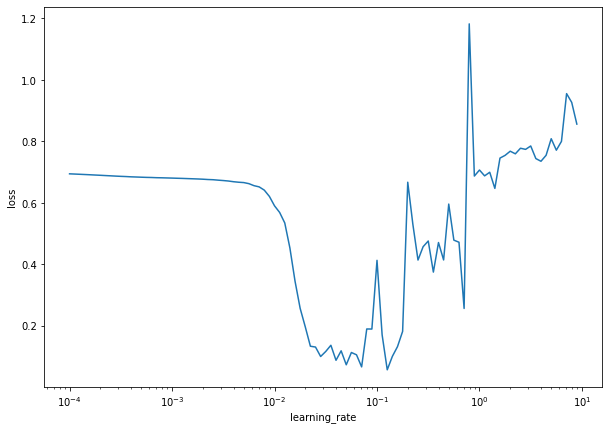

In [ ]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,hist8.history['loss'])
plt.xlabel('learning_rate')
plt.ylabel('loss')

In [ ]:
tf.random.set_seed(42)
model9=tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(0.02),
               metrics=['accuracy'])
hist9=model9.fit(X_train,y_train,epochs=20)

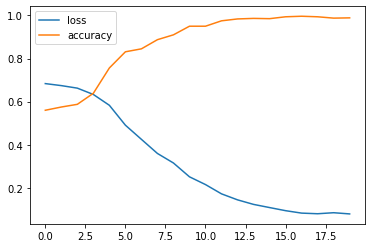

In [ ]:
pd.DataFrame(hist9.history).plot()

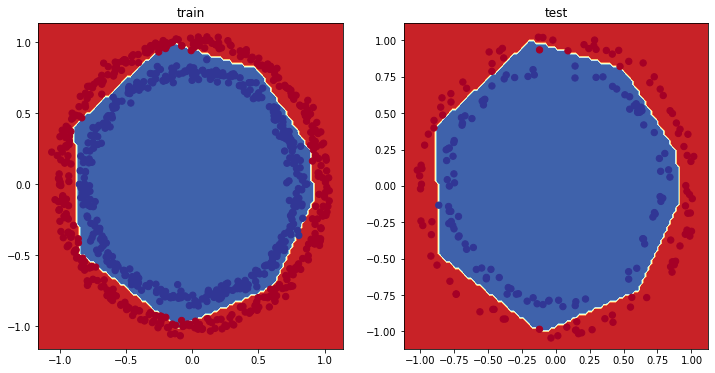

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model9,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model9,X_test,y_test)

In [ ]:
loss,accuracy = model9.evaluate(X_test,y_test)
loss,accuracy

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


(0.05740184709429741, 0.9900000095367432)

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds = model9.predict(X_test)
y_preds=tf.round(y_preds)
confusion_matrix(y_test,y_preds)

array([[99,  2],
       [ 0, 99]])

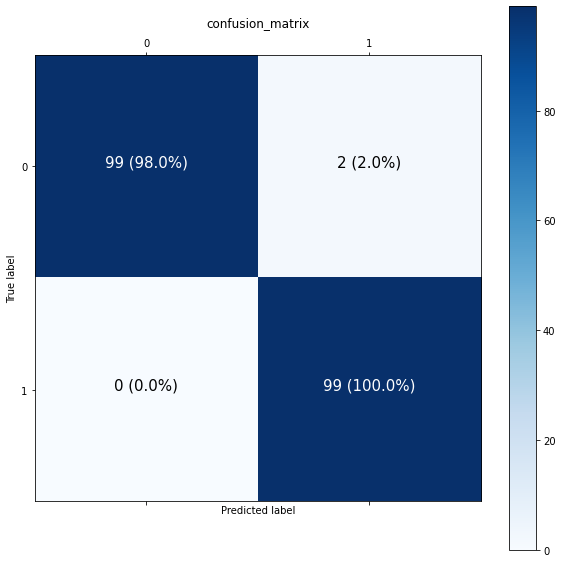

In [ ]:
import itertools
figsize=(10,10)
cm=confusion_matrix(y_test,y_preds)
cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
n_classes=cm.shape[0]

fig,ax = plt.subplots(figsize=figsize)
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

classes=False
if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

ax.set(title='confusion_matrix',
       xlabel='Predicted label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
threshold=(cm.max()+cm.min())/2.

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i,j]>threshold else 'black',size=15)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
(train_data.shape, train_labels.shape), (test_data.shape, test_labels.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

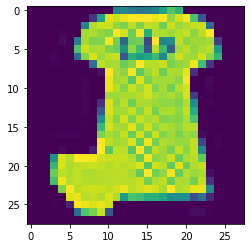

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[70])

In [ ]:
class_names=["T-shirt/top","Trouser","Pullover","Dress",
             "Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

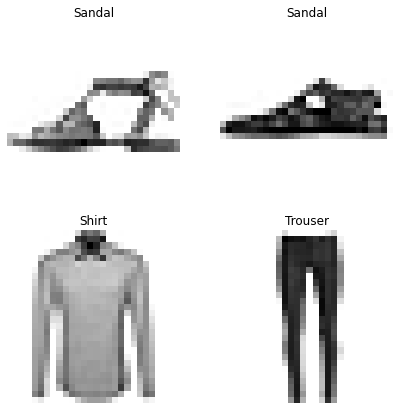

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)
model10=tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
model10.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
hist10=model10.fit(train_data,train_labels,epochs=10,
                   validation_data=(test_data,test_labels))

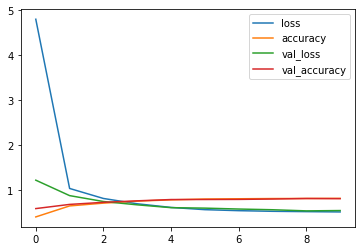

In [ ]:
pd.DataFrame(hist10.history).plot()

In [ ]:
train_data_norm,test_data_norm=train_data/255.0,test_data/255.0

In [ ]:
tf.random.set_seed(42)
model11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
hist11=model11.fit(train_data_norm,train_labels,epochs=10,
                   validation_data=(test_data_norm,test_labels))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5428 - accuracy: 0.8077 - val_loss: 0.5787 - val_accuracy: 0.7971
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5373 - accuracy: 0.8097 - val_loss: 0.5698 - val_accuracy: 0.7977
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5360 - accuracy: 0.8124 - val_loss: 0.5658 - val_accuracy: 0.8014


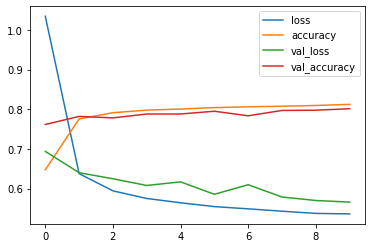

In [ ]:
pd.DataFrame(hist11.history).plot()

In [ ]:
tf.random.set_seed(42)
model12=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])
model12.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

hist12=model12.fit(trainlr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))_data_norm,train_labels,epochs=40,callbacks=[lr_scheduler],
                   validation_data=(test_data_norm,test_labels))

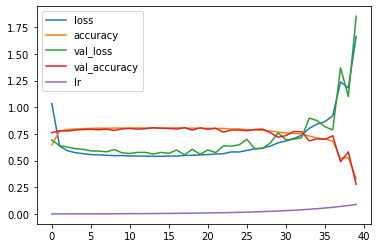

In [ ]:
pd.DataFrame(hist12.history).plot()

Text(0, 0.5, 'loss')

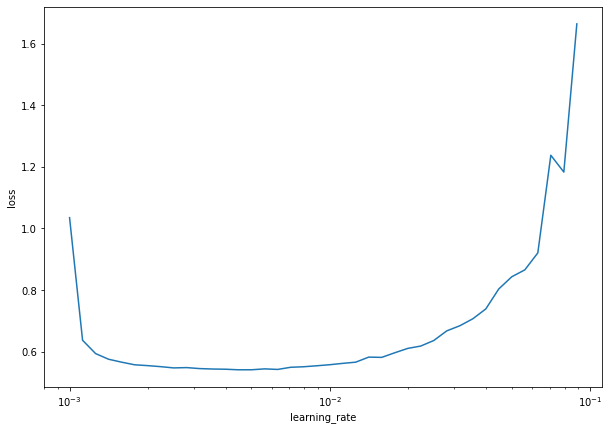

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,hist12.history['loss'])
plt.xlabel('learning_rate')
plt.ylabel('loss')

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
figsize=(10,10)

def make_confusion_matrix(y_true,y_preds,classes=None,figsize=(10,10),
                          text_size=15):
  cm=confusion_matrix(y_true,y_preds)
  cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  n_classes=cm.shape[0]

  fig,ax = plt.subplots(figsize=figsize)
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  ax.set(title='confusion_matrix',
        xlabel='Predicted label',
        ylabel='True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold=(cm.max()+cm.min())/2.

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i,j]>threshold else 'black',size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
tf.random.set_seed(42)
model13=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])
model13.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
hist13=model13.fit(train_data_norm,train_labels,epochs=20,
                   validation_data=(test_data_norm,test_labels))

In [ ]:
y_probs = model13.predict(test_data_norm)
y_probs[:5]
# make_confusion_matrix()

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

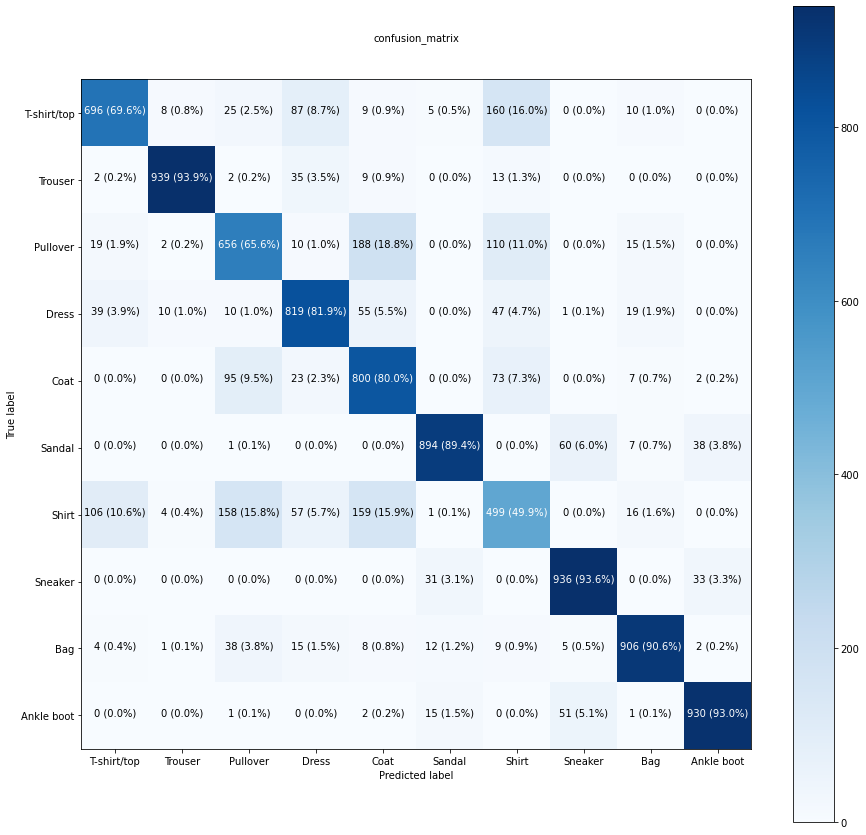

In [ ]:
y_preds = y_probs.argmax(axis=1)
make_confusion_matrix(test_labels,y_preds,classes=class_names,figsize=(15,15),text_size=10)

In [ ]:
import random

def plot_random_image(model,images,true_labels,classes):
  i=random.randint(0,len(images))
  target_image = images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  plt.imshow(target_image,cmap=plt.cm.binary)

  if pred_label==true_label:
    color='green'
  else:
    color='red'

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),color=color)


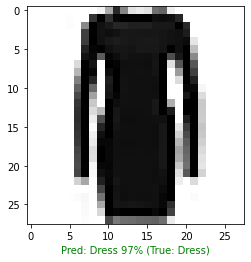

In [ ]:
plot_random_image(model13,images=test_data_norm,true_labels=test_labels,classes=class_names)

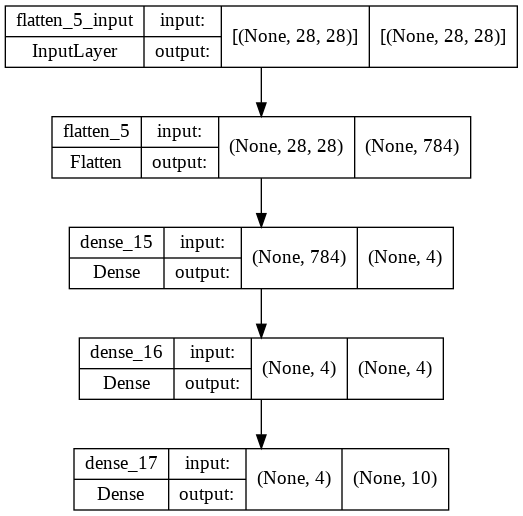

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model13, show_shapes=True)